## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## 2. Getting the Data or Import Data

In [2]:
taxi_jan_2019 = pd.read_csv('data/yellow_tripdata_2019-01.csv')

In [3]:
# Unable to run the command, error -> name 'taxi_jan_19' is not defined
taxi_data = pd.concat([taxi_jan_2019])

In [4]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [5]:
print(taxi_data.shape)

(7667792, 18)


## 3. Data Exploration

In [6]:
# Also Check the Data Dictionary to get the details of the columns. (Get it from projects links in notes app)
taxi_data.columns 

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [7]:
#Here we are only getting the relevant columns we need for this project and eliminating irrevalent columns or features.(refer the data dictionary)
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count','trip_distance','RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type','total_amount']]

In [8]:
#checking the new dataset with filtered columns.
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


array([[<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

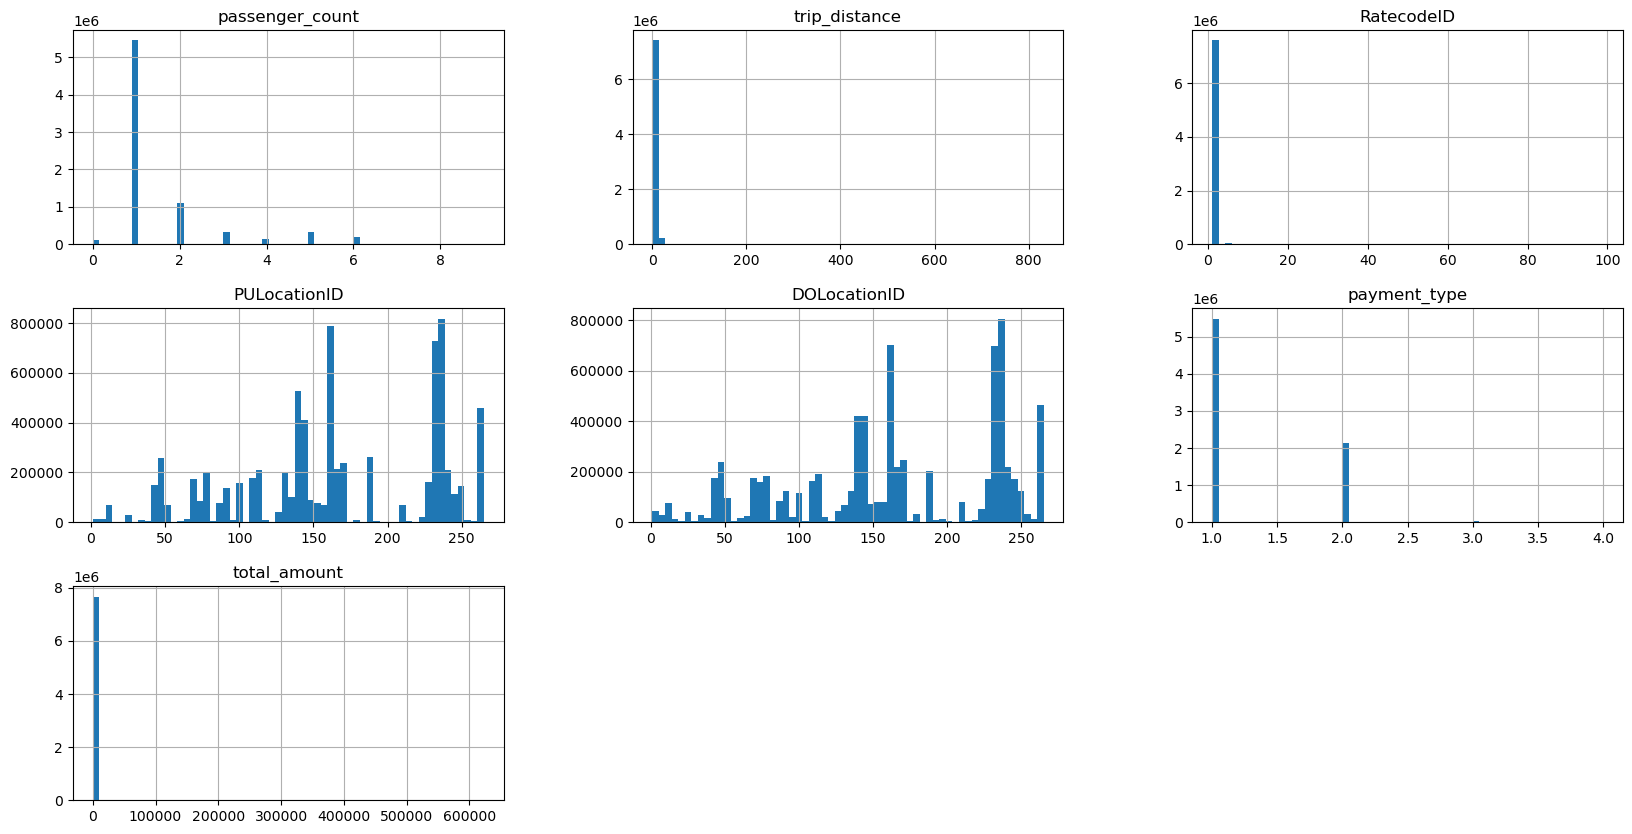

In [9]:
#One great way to explore a data is by plotting it.
taxi_data.hist(figsize=(20,10), bins=60) 
#we are using histogram to explore the data for different feature 
#we are how many instances occure in each value of the feature

In [10]:
#After observing the data which need more observation
#The histogram shows 0-100 values but only 1 is showed since it has the major instances. 
taxi_data['RatecodeID'].value_counts()
#After observing we dont see any problem with the feature.

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

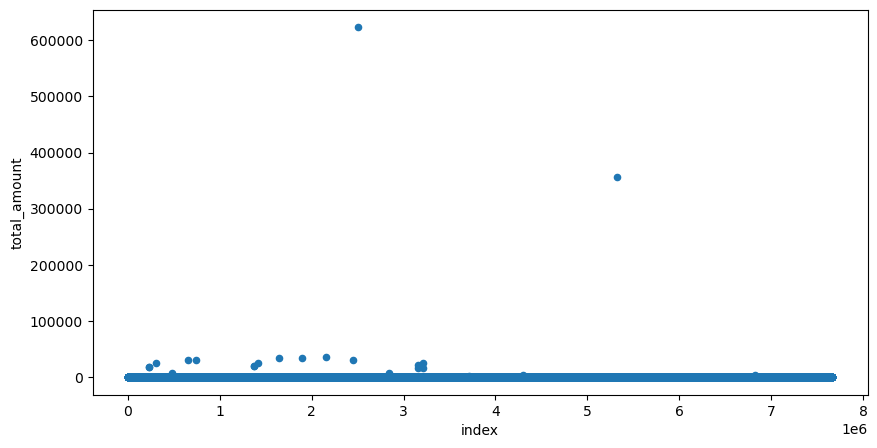

In [11]:
#Now we are checking the 'total_amount' feature which showed outliers amount such as nearly 600000 which is impossible,
#In order to make sure we are plotting it again to check if its true
taxi_data.reset_index().plot(kind='scatter', y= 'total_amount', x= 'index', figsize=(10,5))
#As we can see there are some outliers in this 'total_amount' feature.

<AxesSubplot:xlabel='index', ylabel='total_amount'>

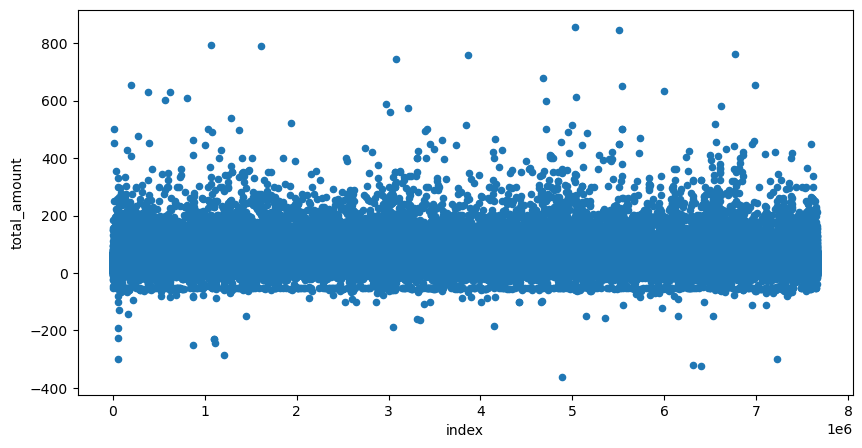

In [12]:
#Now we will check the values which we can see below roughly less than 1000 dollars
taxi_data[taxi_data['total_amount'] < 1000].reset_index().plot(kind='scatter', y= 'total_amount', x= 'index', figsize=(10,5))
#Clearly this makes alot of sense than before, it because we had some outliers which affected our visualization
#we also have negatives values which I need take care of since amount cannot be in negative value

#Two things I need to take care of: 
#  1. negative values
#  2. high values

#### Data Problem 1: Taking care of the negative values in 'total_amount' feature
#####      -Domain knowledge is important to solve data problems, we can ask the domain expert before we do anything with the dataset

In [13]:
print(taxi_data[taxi_data['total_amount']<0].shape)
#These are the number of negative values we have in our dataset
#We do this to know how much harm we are doing to the dataset if we delete them.

(7131, 9)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

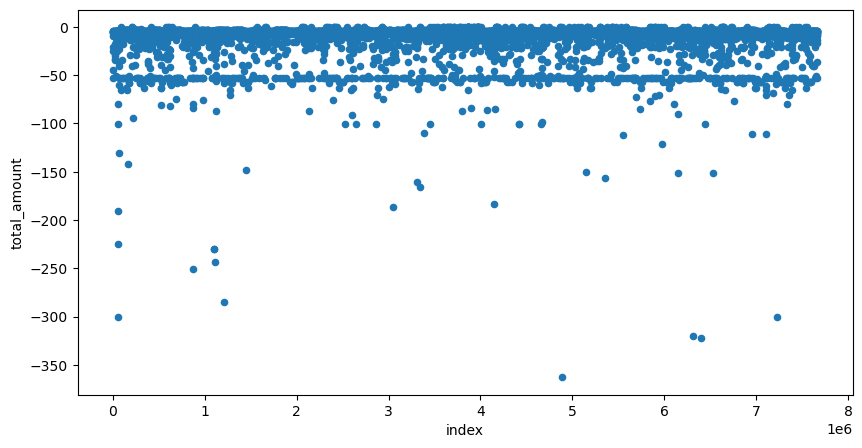

In [14]:
#Plotting the negative values in our dataset to have a closer look.
taxi_data[taxi_data['total_amount'] < 0].reset_index().plot(kind='scatter', y= 'total_amount', x= 'index', figsize=(10,5))

In [15]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


In [16]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()
#I can observe here that most of the negative values have the payment type 3,4 (check the data dictionary)

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

<AxesSubplot:>

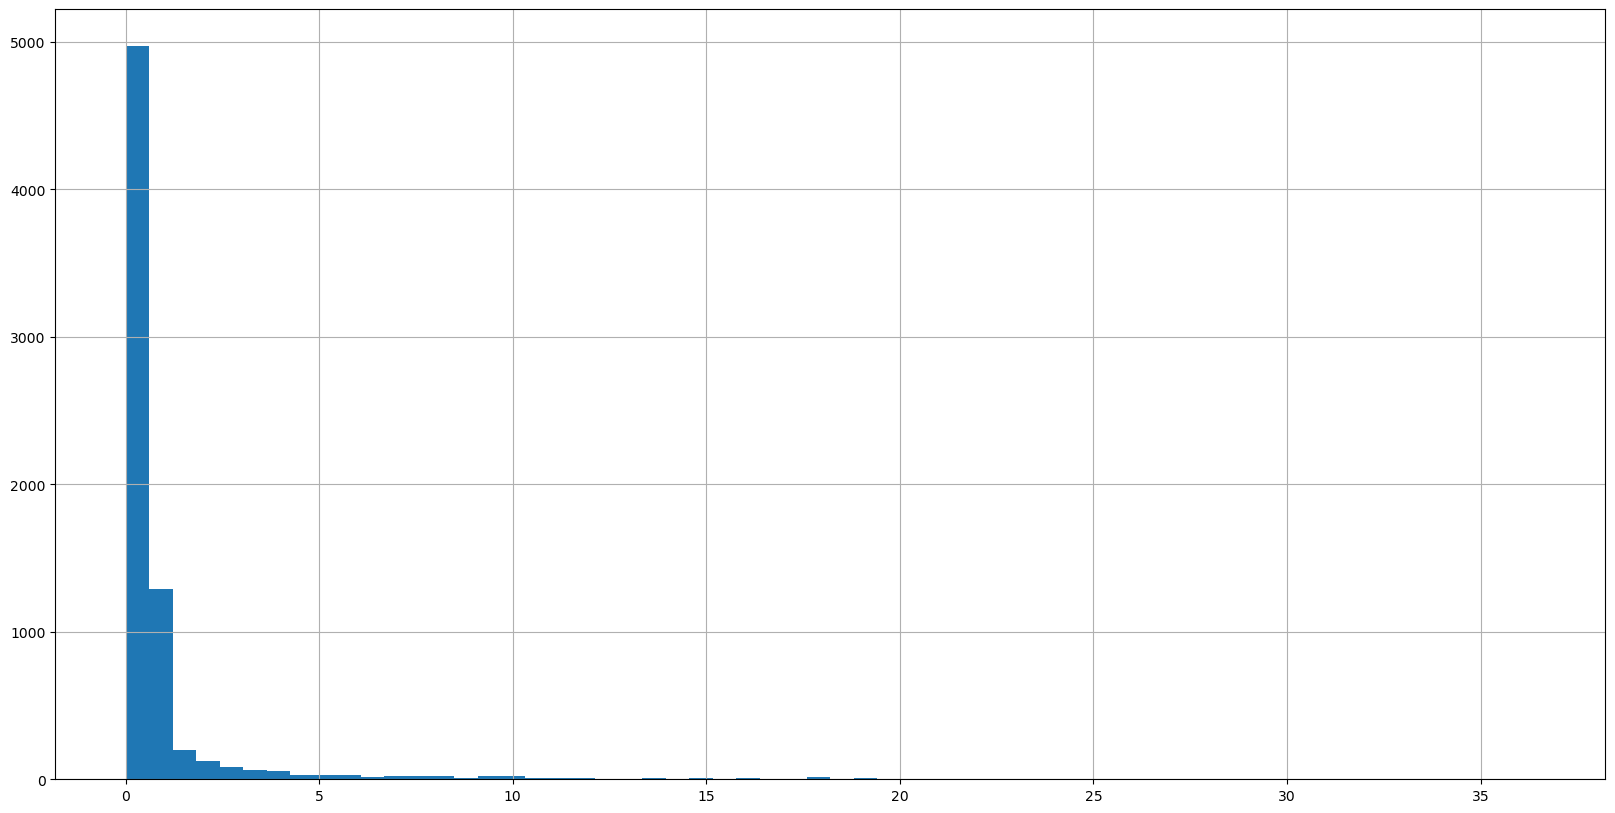

In [17]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(figsize=(20,10), bins=60)

In [18]:
#Checking the 0 values for 'total_amount' because if the amount is 0 it is not necessary for the model and it will be confusing for it.
print(taxi_data[taxi_data['total_amount']==0].shape)

(1414, 9)


In [19]:
taxi_data[taxi_data['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [20]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

<AxesSubplot:>

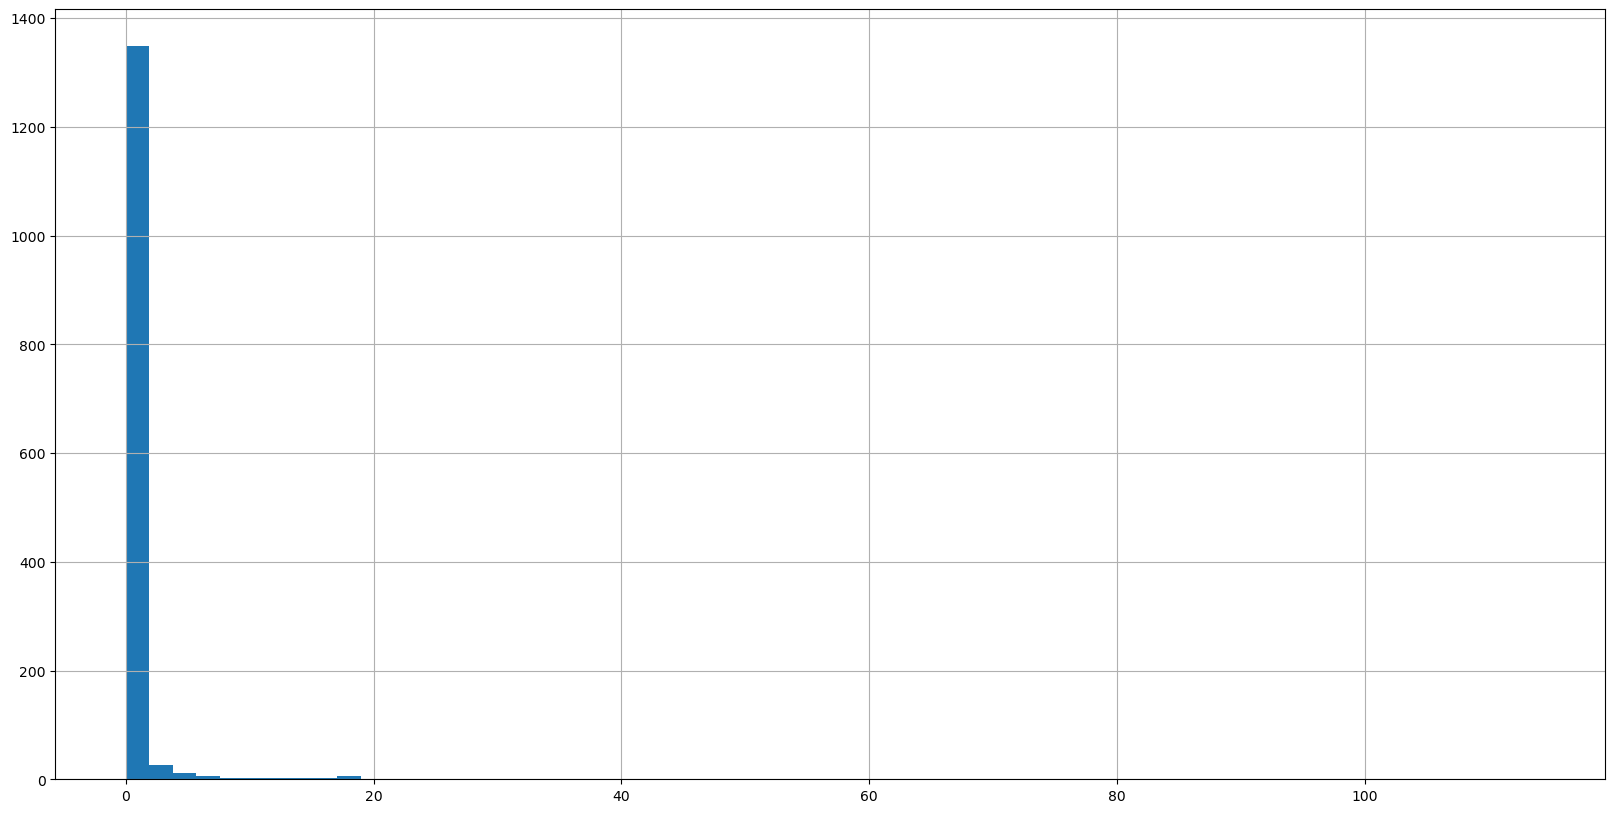

In [21]:
#Checking this to know distance travelled which leaded for 0 dollars total amount.
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(figsize=(20,10), bins=60)
#As we can see it is most 0 miles for 0 total amount.

In [22]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

0.00     1270
1.00        4
0.02        4
0.01        4
0.10        3
         ... 
0.59        1
10.84       1
2.91        1
1.20        1
0.53        1
Name: trip_distance, Length: 110, dtype: int64

#### Data Problem 2: High Values
##### -we will be seeing the outliers in our dataset.

<AxesSubplot:xlabel='index', ylabel='total_amount'>

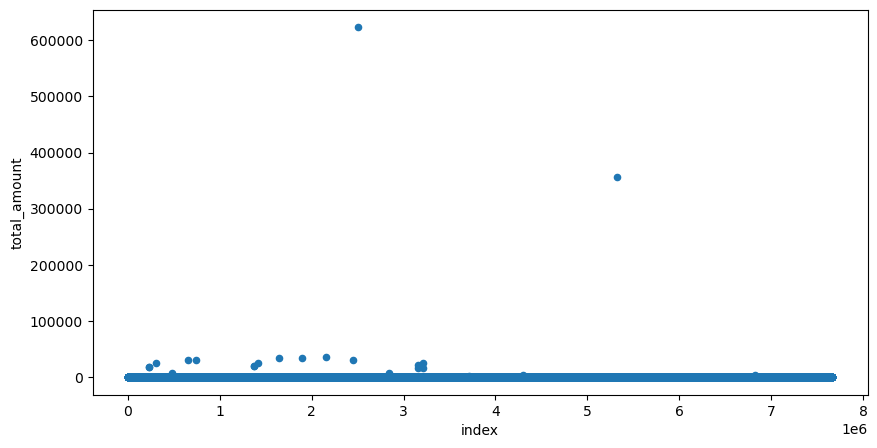

In [23]:
#Plotting to see the very high values.
taxi_data.reset_index().plot(kind='scatter', y= 'total_amount', x= 'index', figsize=(10,5))

In [24]:
#I will check how many data points we have which is more 500 dollars, we check with different values to get a breakpoint such
#as 100,200,300
taxi_data[taxi_data['total_amount']>200].shape
#200 dollars seems to be a good cut out point. 

(1166, 9)

In [25]:
#I will check the mean amount of money people pay for the taxi
taxi_data['total_amount'].mean()

15.68222215901336

## 4. Data Cleaning 
### - we saw the data problems in the previous section and now we will try to clean them.

In [26]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0) & (taxi_data['total_amount']<200)]

In [27]:
#Comparing
print(taxi_data.shape)
taxi_data_filtered.shape

(7667792, 9)


(7659490, 9)

In [28]:
#To check if there are any missing values
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## 5. Data Preparation
### - Preparing our dataset for the machine learning model. 

In [29]:
#Copying the filtered data to prepared first so that we can start for data preparation
#I also do this so incase if I make any mistake during data preparation I can come back to the original without redoing the whole program.
#We are deep copying the dataframe to new variable instead of shallow copying.
taxi_data_prepared = taxi_data_filtered.copy()

In [30]:
#Making sure everything is right type
taxi_data_prepared.dtypes
#RatecodeID is integer type but its a categorical data, so we have to change it to categorical data and same goes for 
#PULocationID,DOLocationID,payment_type. 
#As for tpep_pickup_datetime & tpep_dropoff_datetime we need to change with datatime function.    

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [31]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


#### Dealing with dtypes

In [32]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [33]:
#Changing the interger data to categorical data for the following features.
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared.loc[:,'RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared.loc[:,'PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared.loc[:,'DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared.loc[:,'payment_type'].astype(str)

In [34]:
taxi_data_prepared.dtypes
#now we have the dtypes as we want to

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

#### Information Extraction

In [35]:
#now that we have changed the dtypes of datetime in pickup and dropoff, now I will seperate the features into date, year, hour, etc.
#It will easier to feed the model.
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
# we make it datetime again because it very little use when it's just a string (can't compare, sort, etc)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [36]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

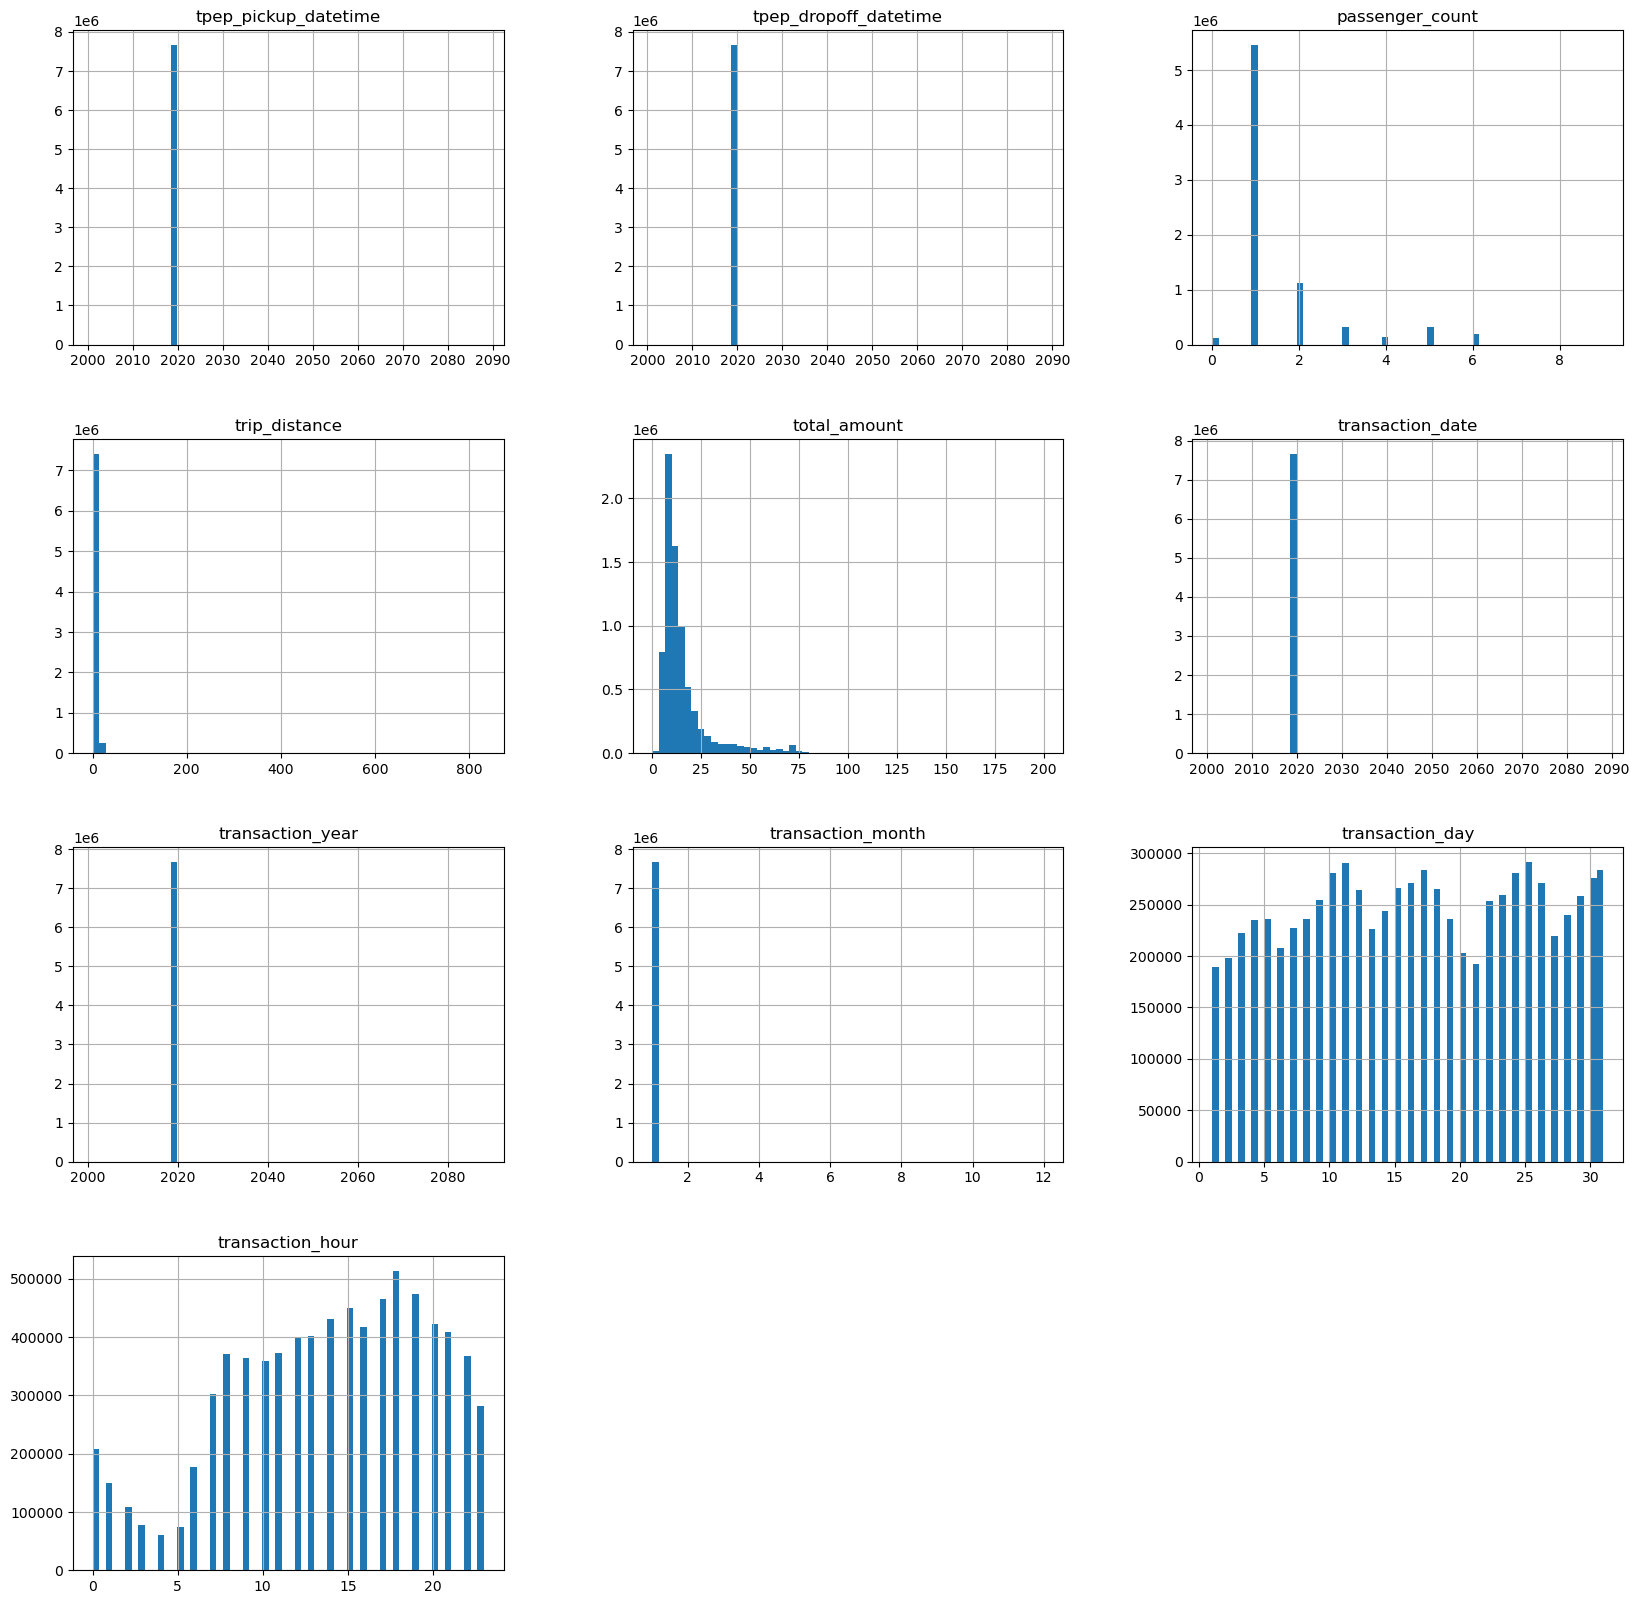

In [37]:
#As we can see above there are some 2018 values in out dataframe but we only took jan_2019 dataset.
#Now I have to look to more into the dataframe in order to clean more data from invalid values.
#I will have a look with histogram to check the values
taxi_data_prepared.hist(figsize=(20,20), bins=60)
#As we can see there are invalid instances in some of features such as transaction_year, transaction_month, etc.

In [38]:
#We only want year 2019 and month january(1)
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year'] == 2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month'] == 1]

array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

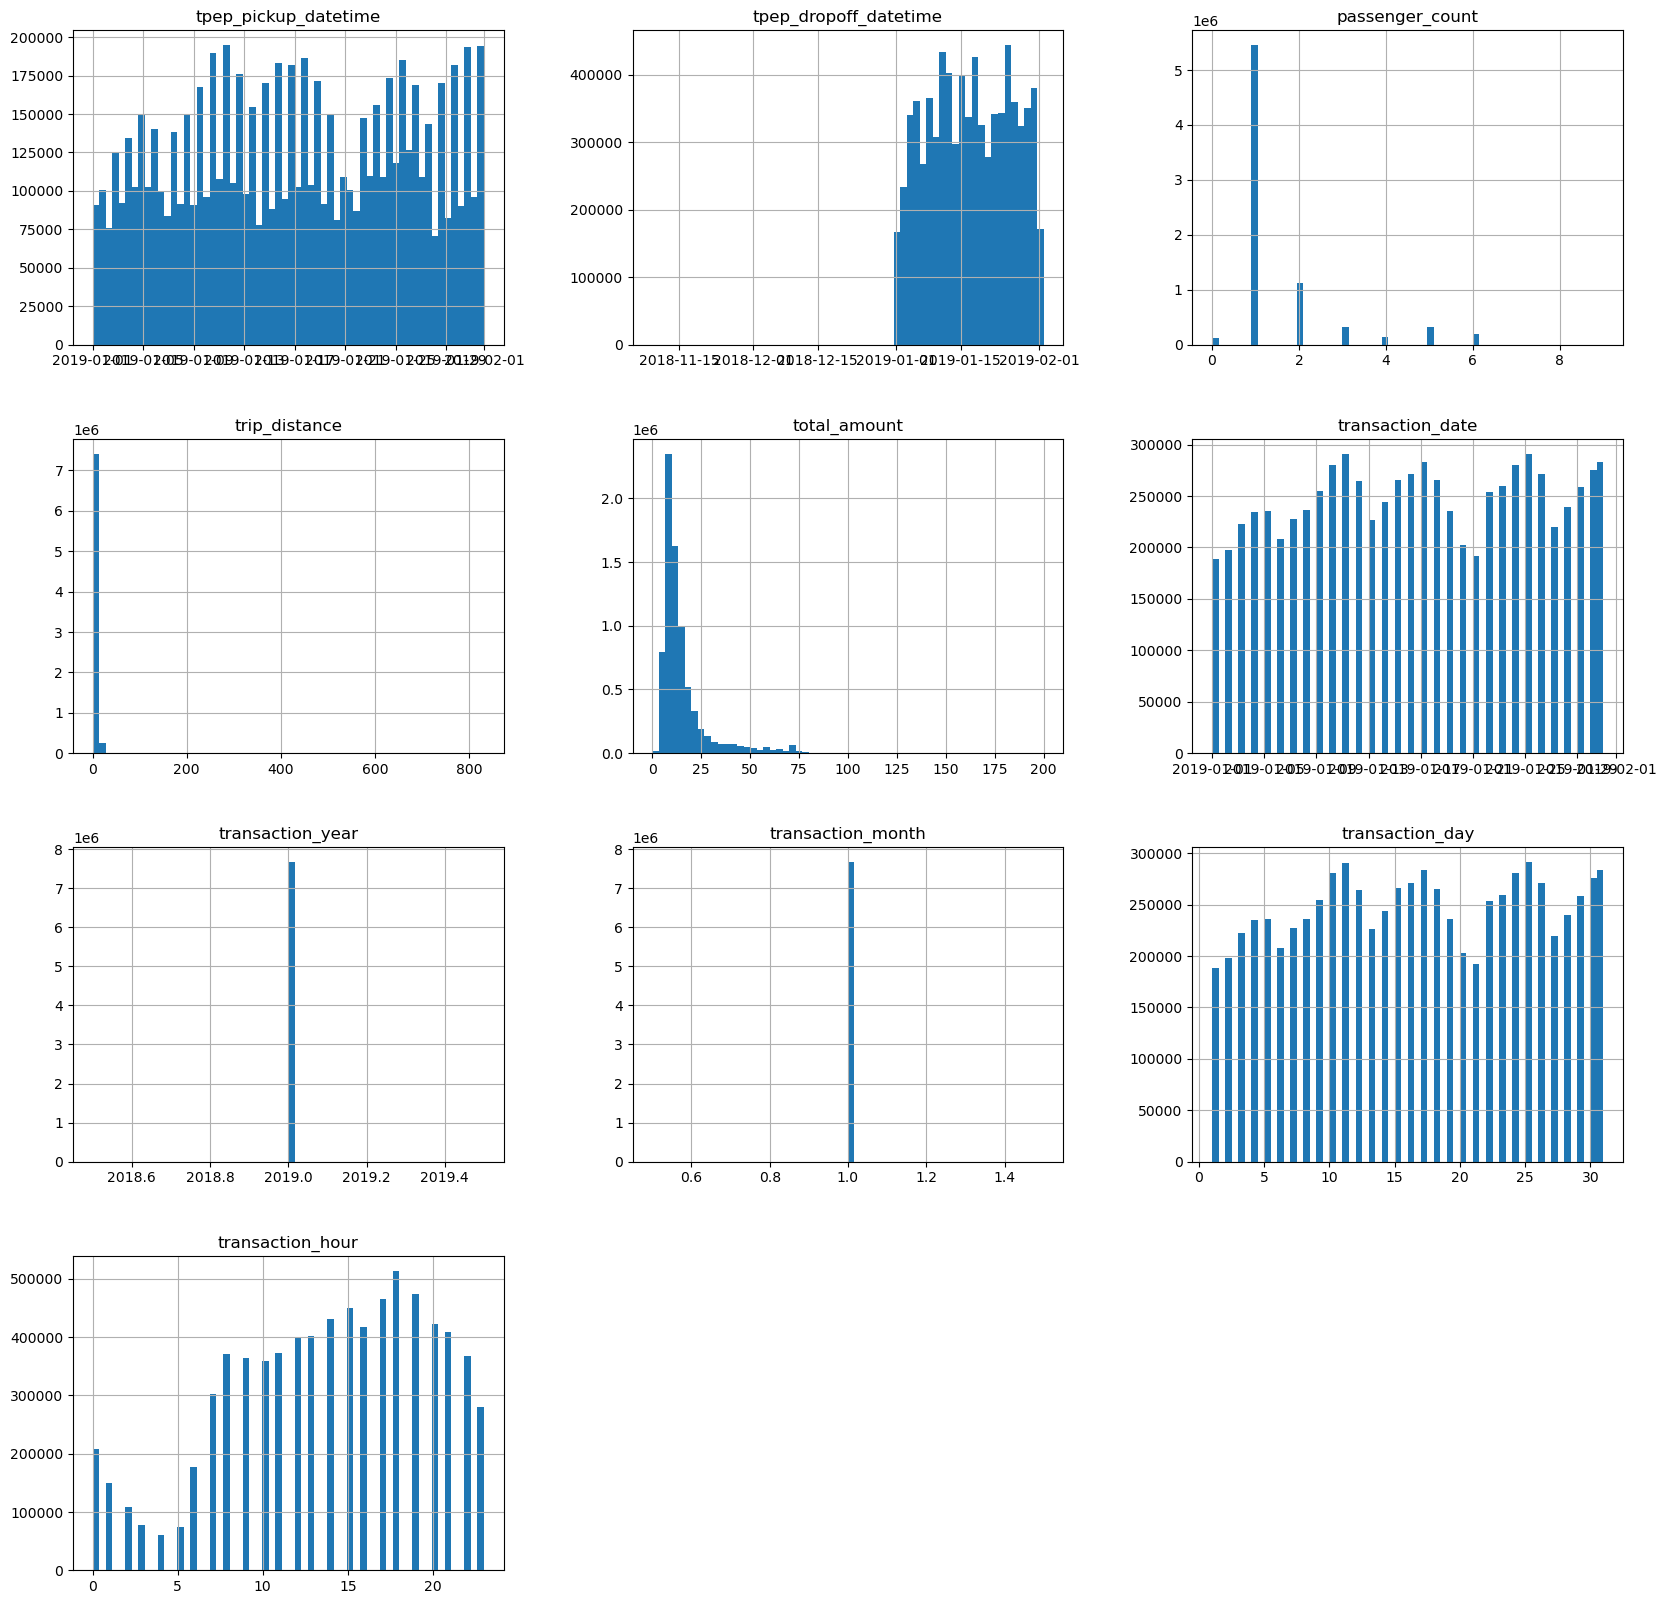

In [39]:
taxi_data_prepared.hist(figsize=(20,20), bins=60)

## What do we want to acheive in this notebook?
### - Problem statement --> Predict how much money or the average money that people spend for a cab ride in new york in certain region in given hour of a day of a month.

### we have to agregate the data that brings us for every region of every hour of every different day and the average or mean of all the transaction that happened in that certain day, in that certain hour and in that certain region.


##### Noting down our categorical values and numerical values

In [40]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [41]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [42]:
#I left behind certain features because I cannot use them in our model, it won't improve our model.
#I kept them so far because it helped me for data cleaning and preparation. 

#### Aggregating data points in our dataframe - by combining PULocationID and transaction_date and get the average amount

In [43]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transaction'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head(20)

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction
0,1,2019-01-01,1,1,2,0.0000,21.8000,1
1,1,2019-01-01,1,1,5,0.0000,87.3000,1
2,1,2019-01-01,1,1,6,0.0000,80.3000,1
3,1,2019-01-01,1,1,8,0.0000,128.5800,2
4,1,2019-01-01,1,1,10,16.9000,43.2450,4
5,1,2019-01-01,1,1,12,4.8250,126.2525,4
6,1,2019-01-01,1,1,13,0.0000,85.3000,1
7,1,2019-01-01,1,1,15,20.6400,79.3100,2
8,1,2019-01-01,1,1,17,0.0000,105.5000,1
9,1,2019-01-01,1,1,19,0.0550,115.3300,2


<AxesSubplot:>

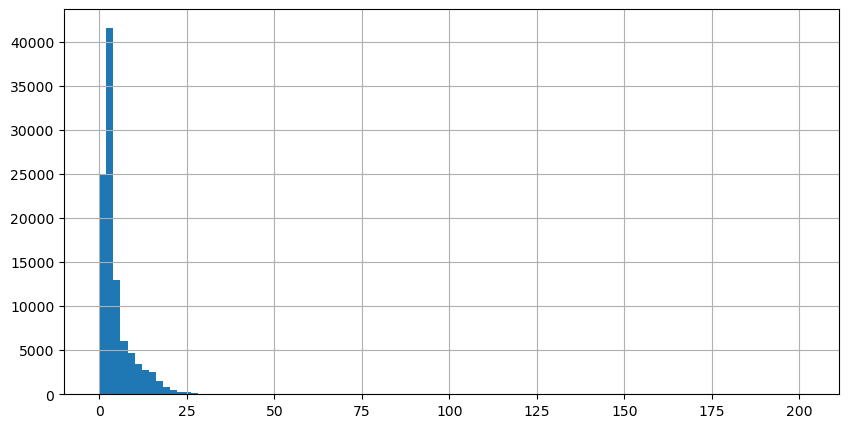

In [44]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<AxesSubplot:>

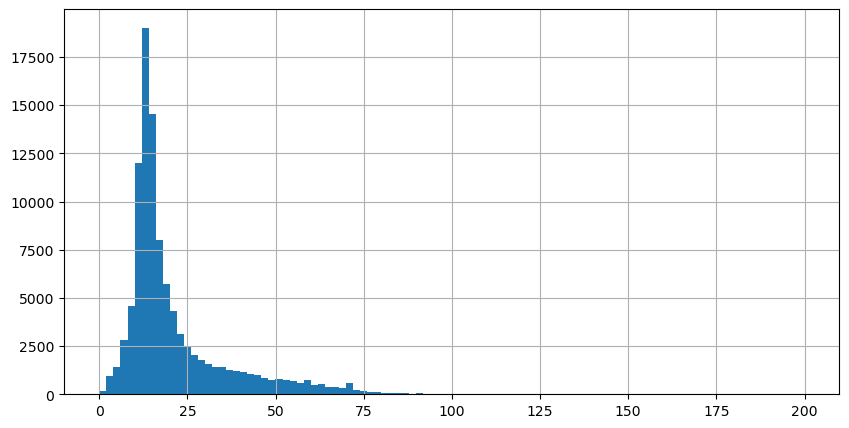

In [45]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

## 6. Benchmark Model 
### - Benchmarking is crucial to understanding our problem and how effective our solution is. A benchmark model is a model that has the bare minimum information that is trained with as little effort as possible. It is the baseline we will compare our hard-worked-on models to see if all the work we will to to generate new feature and tune the models will be in vain or not.
### - We are running this model without any feature engineering to get a benchmark ofc

In [46]:
#First we copy the taxi_grouped_by_region to a new dataframe. 
#Then we will get our input features and our target features
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [47]:
#we are including the month day and hour in categorical features because it is a circular feature.
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_feature_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

### Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_feature_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

#One-hot Encoding for categorial features
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

### Fit a model to the data

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth =10)
tree.fit(X_train_b,y_train_b)

DecisionTreeRegressor(max_depth=10)

### Model Evaluation - Performance Metric 
#### - We do this to know how well our model Performed

In [50]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('Mean Absolute error: ', mean_absolute_error(y_test_b, y_pred_b))
print('Mean Squared error: ', mean_squared_error(y_test_b, y_pred_b))
print('Root mean squared error: ', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('R2 Score: ', r2_score(y_test_b, y_pred_b))

Mean Absolute error:  3.4349577632839927
Mean Squared error:  64.58673923064111
Root mean squared error:  8.036587536426211
R2 Score:  0.7695184009023923


<AxesSubplot:xlabel='true', ylabel='pred'>

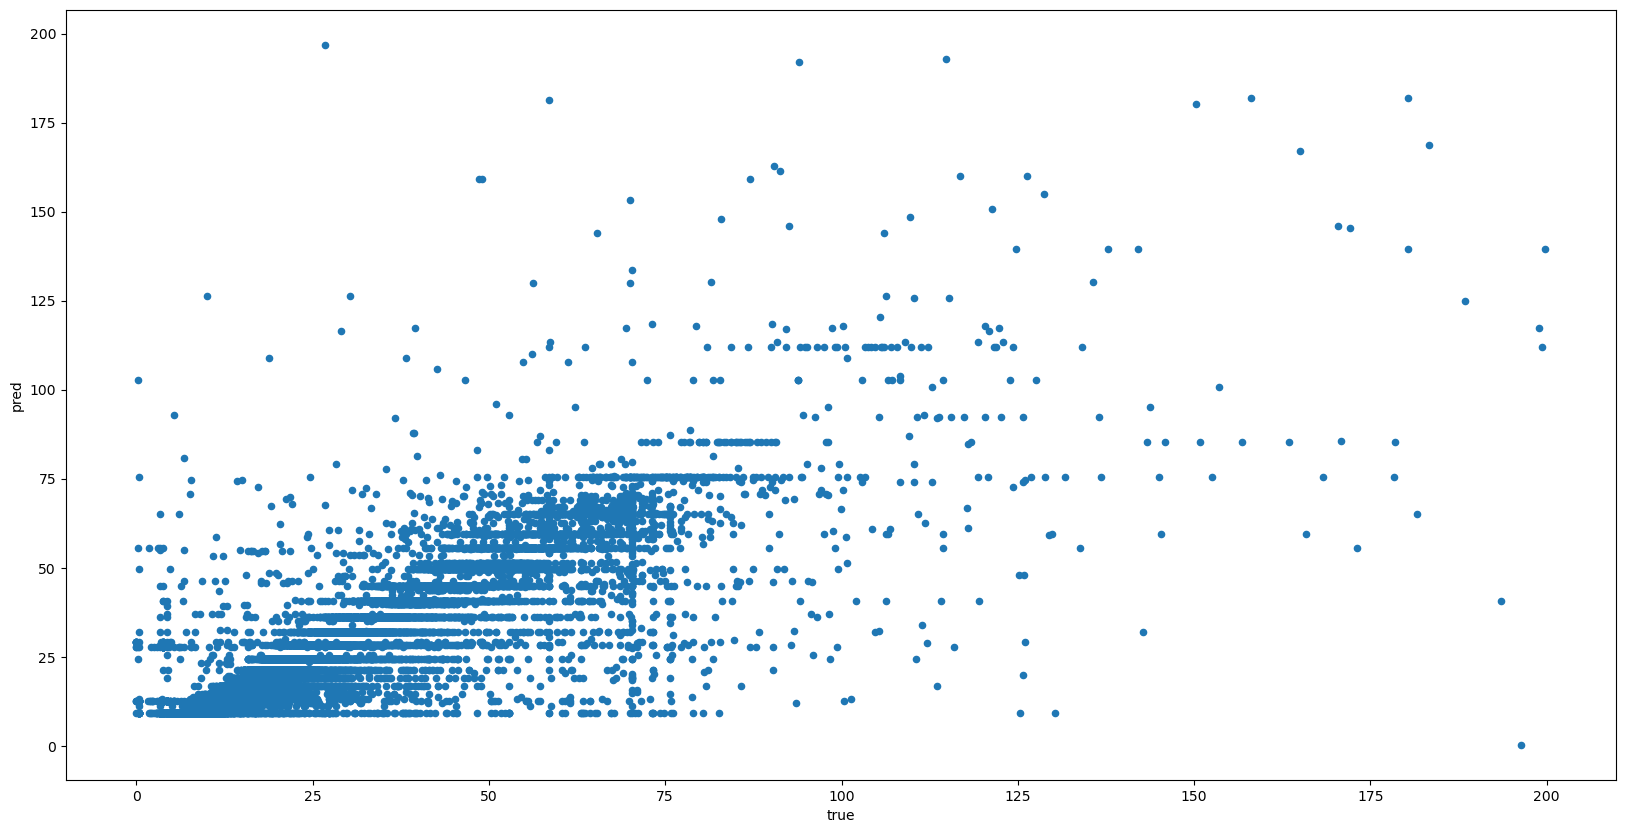

In [51]:
#Plotting our prediction
data = {'true': y_test_b , 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### Fix the Problem
#### - As we can see above our model performed really well and too well. It's too good to be true. So if we check our data we can see that in the input feature we have also included trip distance, which directly corealts to the total amount. If we know the distance a passenger is travelling we can easily predict how much it is going to cost. So it solve that we remove the trip distance feature and rerun our machine learning model again. 

In [52]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.77801350668588
mean_squared_error 217.2348610979561
root_mean_squared_error 14.738889411958965
r2 0.22478454924304103


## Feature Engineering 
### - So far we've only worked with the information that came built in from the data we downloaded. But we don't need to get stuck using the same old features, there is much more we can do. We're about to start feature engineering. It is where we should think about some other features we can come up with that just might improve our predictions.

In [53]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [54]:
data_with_new_features = taxi_grouped_by_region.copy()

#### Date related features

In [55]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [56]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [57]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


#### Borough Information

In [58]:
zone_lookup = pd.read_csv('data/taxi+_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)

In [59]:
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [60]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [61]:
data_with_new_features['Borough'].value_counts()

Manhattan        45309
Brooklyn         23633
Queens           22002
Bronx             9586
Unknown           1453
Staten Island      302
EWR                271
Name: Borough, dtype: int64

#### Weather related features

In [62]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [63]:
nyc_weather.shape

(2936, 6)

In [64]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [65]:
nyc_weather['cloud cover'].value_counts()

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [66]:
nyc_weather['amount of precipitation'].value_counts()

Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0                        1
Name: amou

In [67]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

#### Trace of precipitation can be thought of as 0.1
#### And the missing values 0

In [68]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True) forward fill & backward fill
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [69]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [70]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [71]:
nyc_weather.loc[:,'date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'])
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [72]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [73]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [74]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102556, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [75]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)


In [76]:
nyc_taxi_with_weather.head()


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [77]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transaction           0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                        0
temperature                68371
humidity                   68371
wind speed                 68371
cloud cover                68371
amount of precipitation    68371
dtype: int64

In [78]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [79]:
#nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
#nyc_taxi_with_weather.fillna(method='bfill')
#nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
#nyc_taxi_with_weather['temperature'] = nyc_taxi_with_weather['temperature'].interpolate()
#nyc_taxi_with_weather.isna().sum()

In [80]:
nyc_taxi_with_weather.dtypes

PULocationID                       object
transaction_date           datetime64[ns]
transaction_month                   int64
transaction_day                     int64
transaction_hour                    int64
trip_distance                     float64
total_amount                      float64
count_of_transaction                int64
transaction_week_day                int64
weekend                              bool
is_holiday                           bool
Borough                            object
temperature                       float64
humidity                          float64
wind speed                        float64
cloud cover                       float64
amount of precipitation           float64
dtype: object

In [81]:
nyc_taxi_with_weather.columns

Index(['PULocationID', 'transaction_date', 'transaction_month',
       'transaction_day', 'transaction_hour', 'trip_distance', 'total_amount',
       'count_of_transaction', 'transaction_week_day', 'weekend', 'is_holiday',
       'Borough', 'temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation'],
      dtype='object')

In [82]:
nyc_taxi_with_weather['transaction_month'] = nyc_taxi_with_weather['transaction_month'].astype(float)

In [83]:
nyc_taxi_with_weather['transaction_day'] = nyc_taxi_with_weather['transaction_day'].astype(float)

In [84]:
nyc_taxi_with_weather['transaction_hour'] = nyc_taxi_with_weather['transaction_hour'].astype(float)
nyc_taxi_with_weather['count_of_transaction'] = nyc_taxi_with_weather['count_of_transaction'].astype(float)
nyc_taxi_with_weather['transaction_week_day'] = nyc_taxi_with_weather['transaction_week_day'].astype(float)
nyc_taxi_with_weather['PULocationID'] = nyc_taxi_with_weather['PULocationID'].astype(object)

In [85]:
#nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
#nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
#nyc_taxi_with_weather.isna().sum()

In [86]:
nyc_taxi_with_weather.dtypes

PULocationID                       object
transaction_date           datetime64[ns]
transaction_month                 float64
transaction_day                   float64
transaction_hour                  float64
trip_distance                     float64
total_amount                      float64
count_of_transaction              float64
transaction_week_day              float64
weekend                              bool
is_holiday                           bool
Borough                            object
temperature                       float64
humidity                          float64
wind speed                        float64
cloud cover                       float64
amount of precipitation           float64
dtype: object

In [87]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1.0,1.0,0.0,3.020000,14.300000,2.0,1.0,False,True,Queens,NaN,NaN,NaN,NaN,NaN
1,100,2019-01-01,1.0,1.0,0.0,2.801852,18.130000,54.0,1.0,False,True,Manhattan,NaN,NaN,NaN,NaN,NaN
2,106,2019-01-01,1.0,1.0,0.0,2.593333,15.373333,3.0,1.0,False,True,Brooklyn,NaN,NaN,NaN,NaN,NaN
3,107,2019-01-01,1.0,1.0,0.0,2.437458,14.897458,421.0,1.0,False,True,Manhattan,NaN,NaN,NaN,NaN,NaN
4,11,2019-01-01,1.0,1.0,0.0,1.795000,9.300000,2.0,1.0,False,True,Brooklyn,NaN,NaN,NaN,NaN,NaN


In [88]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transaction           0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                        0
temperature                68371
humidity                   68371
wind speed                 68371
cloud cover                68371
amount of precipitation    68371
dtype: int64

In [89]:
nyc_taxi_with_weather['temperature'] = nyc_taxi_with_weather['temperature'].interpolate()
nyc_taxi_with_weather['humidity'] = nyc_taxi_with_weather['humidity'].interpolate()
nyc_taxi_with_weather['wind speed'] = nyc_taxi_with_weather['wind speed'].interpolate()
nyc_taxi_with_weather['cloud cover'] = nyc_taxi_with_weather['cloud cover'].interpolate()
nyc_taxi_with_weather['amount of precipitation'] = nyc_taxi_with_weather['amount of precipitation'].interpolate()

In [90]:
nyc_taxi_with_weather.isna().sum()

PULocationID                 0
transaction_date             0
transaction_month            0
transaction_day              0
transaction_hour             0
trip_distance                0
total_amount                 0
count_of_transaction         0
transaction_week_day         0
weekend                      0
is_holiday                   0
Borough                      0
temperature                161
humidity                   161
wind speed                 161
cloud cover                161
amount of precipitation    161
dtype: int64

In [91]:
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transaction       0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [92]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1.0,1.0,0.0,3.020000,14.300000,2.0,1.0,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1.0,1.0,0.0,2.801852,18.130000,54.0,1.0,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1.0,1.0,0.0,2.593333,15.373333,3.0,1.0,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1.0,1.0,0.0,2.437458,14.897458,421.0,1.0,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1.0,1.0,0.0,1.795000,9.300000,2.0,1.0,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


## Model Training

In [93]:
data_for_model = nyc_taxi_with_weather.copy()

In [94]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_features = 'total_amount'

### Train-Test Split

In [95]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_features]

#one-hot encoding
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Decision Tree Algorithm

In [96]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [97]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.542237018624997
mean_squared_error 197.2092607107859
root_mean_squared_error 14.043121473190563
r2 0.3048250205179964


<AxesSubplot:xlabel='true', ylabel='pred'>

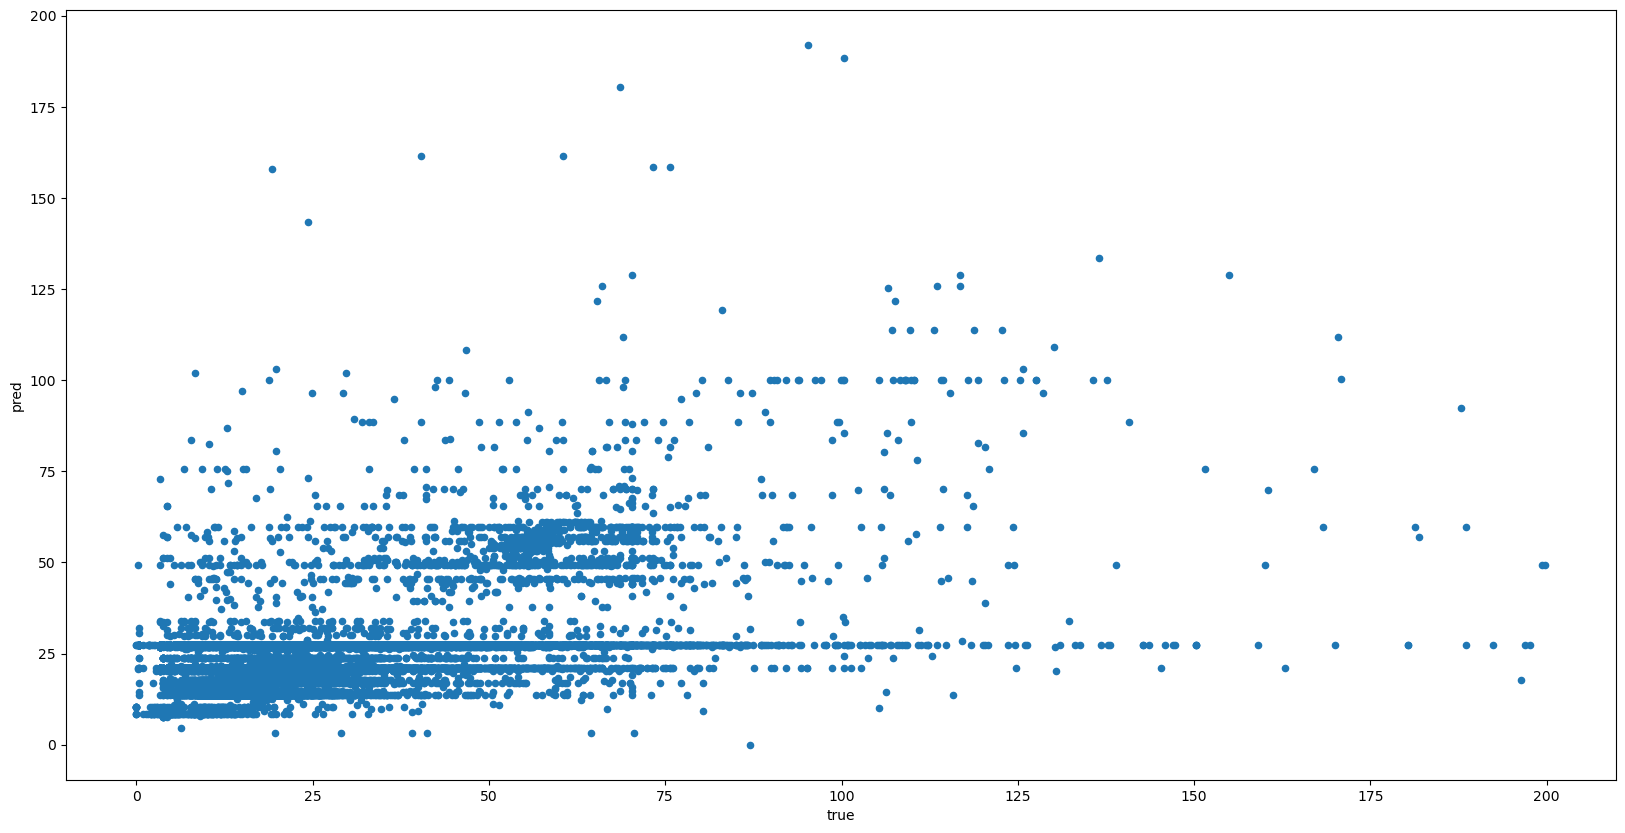

In [98]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Overfitting 
### -The model fits the training data's pattern so much that it loses the ability to generalise.

In [99]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [100]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [101]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.495163e+01,15.174393
1,5,1.412253e+01,14.497210
2,8,1.352369e+01,14.116933
3,10,1.313962e+01,14.023417
4,15,1.204887e+01,14.309189
5,20,1.109997e+01,14.570235
6,30,9.498536e+00,15.008397
7,50,5.425101e+00,16.542256
8,70,1.124518e+00,17.335238
9,100,7.089196e-17,17.405889


Text(0, 0.5, 'root mean squared error')

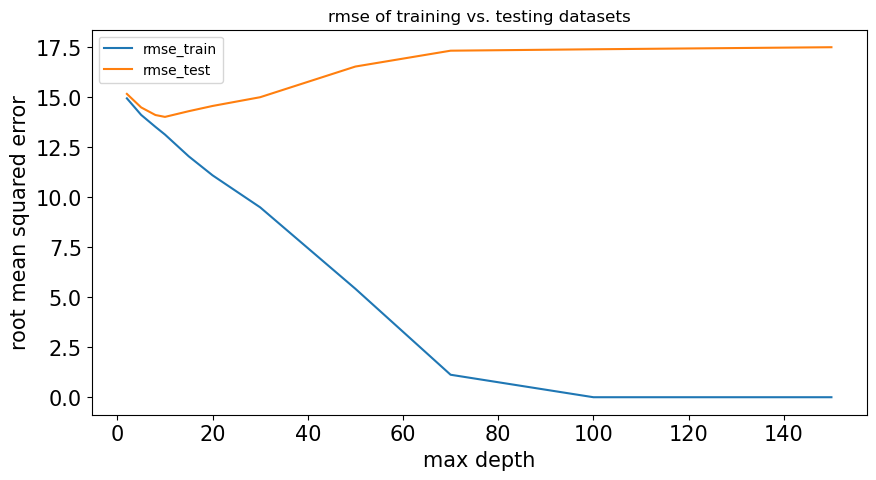

In [102]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

## Undefitting 
### -Underfitting is when the model cannot capture the data's pattern at all

In [103]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [104]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 9.947300430991522
mean_squared_error 239.0808641645717
root_mean_squared_error 15.462239946546285
r2 0.12373835366276398


In [105]:
# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 10.082374129980105
mean_squared_error 249.2344278680738
root_mean_squared_error 15.7871602217775
r2 0.12143305210453059


## Random Forest Algorithm

In [107]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)

RandomForestRegressor()

In [109]:
model_at_hand = random_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.4313390236026455
mean_squared_error 174.8513271043892
root_mean_squared_error 13.223136054067856
r2 0.3836381349735122


<AxesSubplot:xlabel='true', ylabel='pred'>

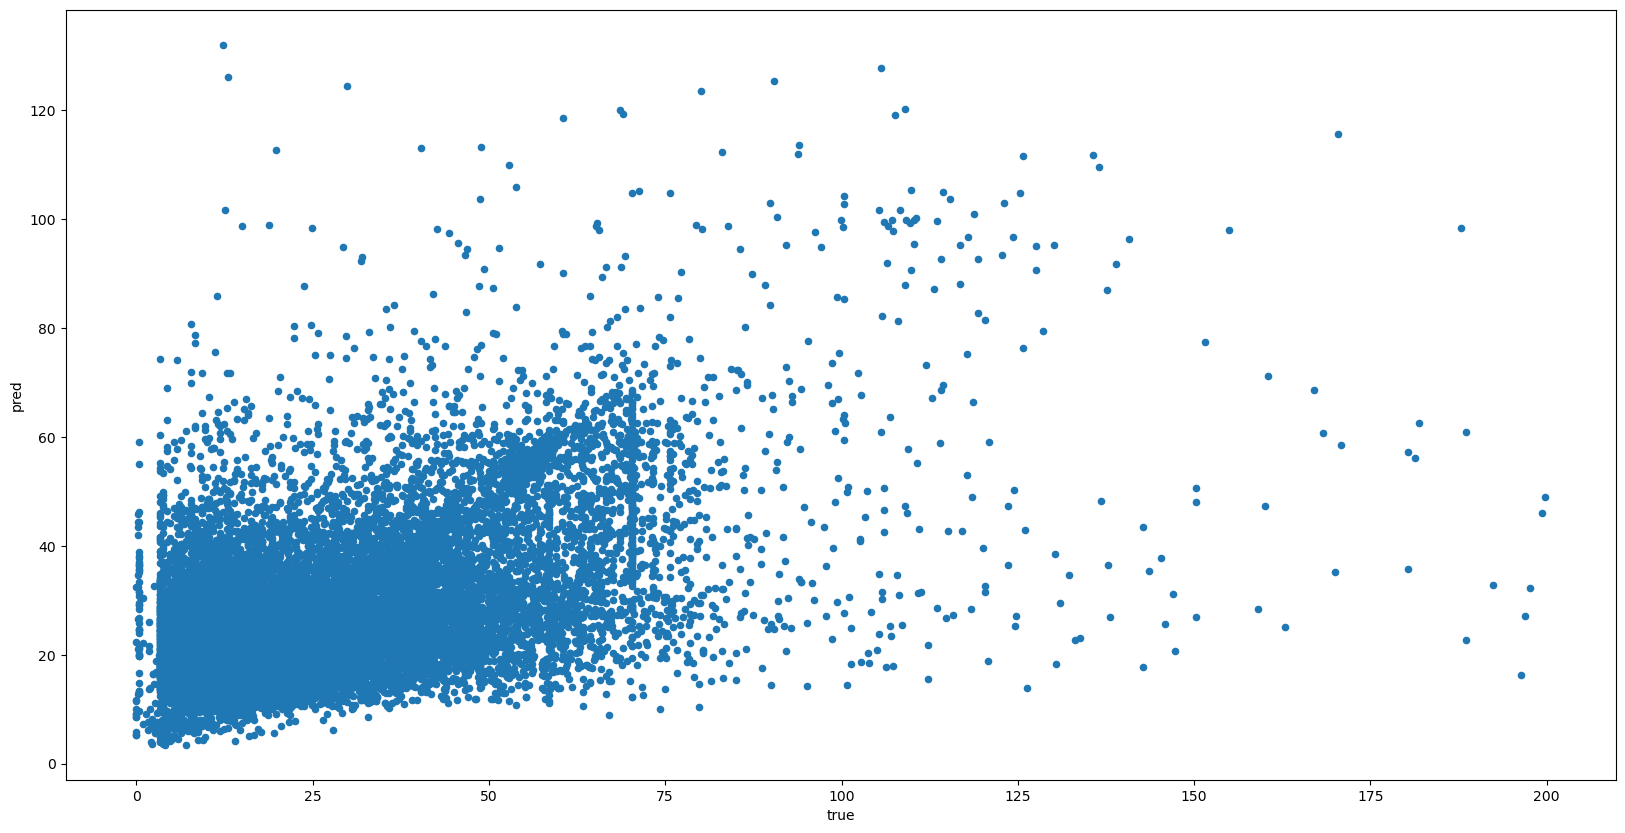

In [110]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Gradient Boosting Algorithm

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [112]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.388531176659647
mean_squared_error 179.01613082251197
root_mean_squared_error 13.379690983819916
r2 0.3689569413578708


<AxesSubplot:xlabel='true', ylabel='pred'>

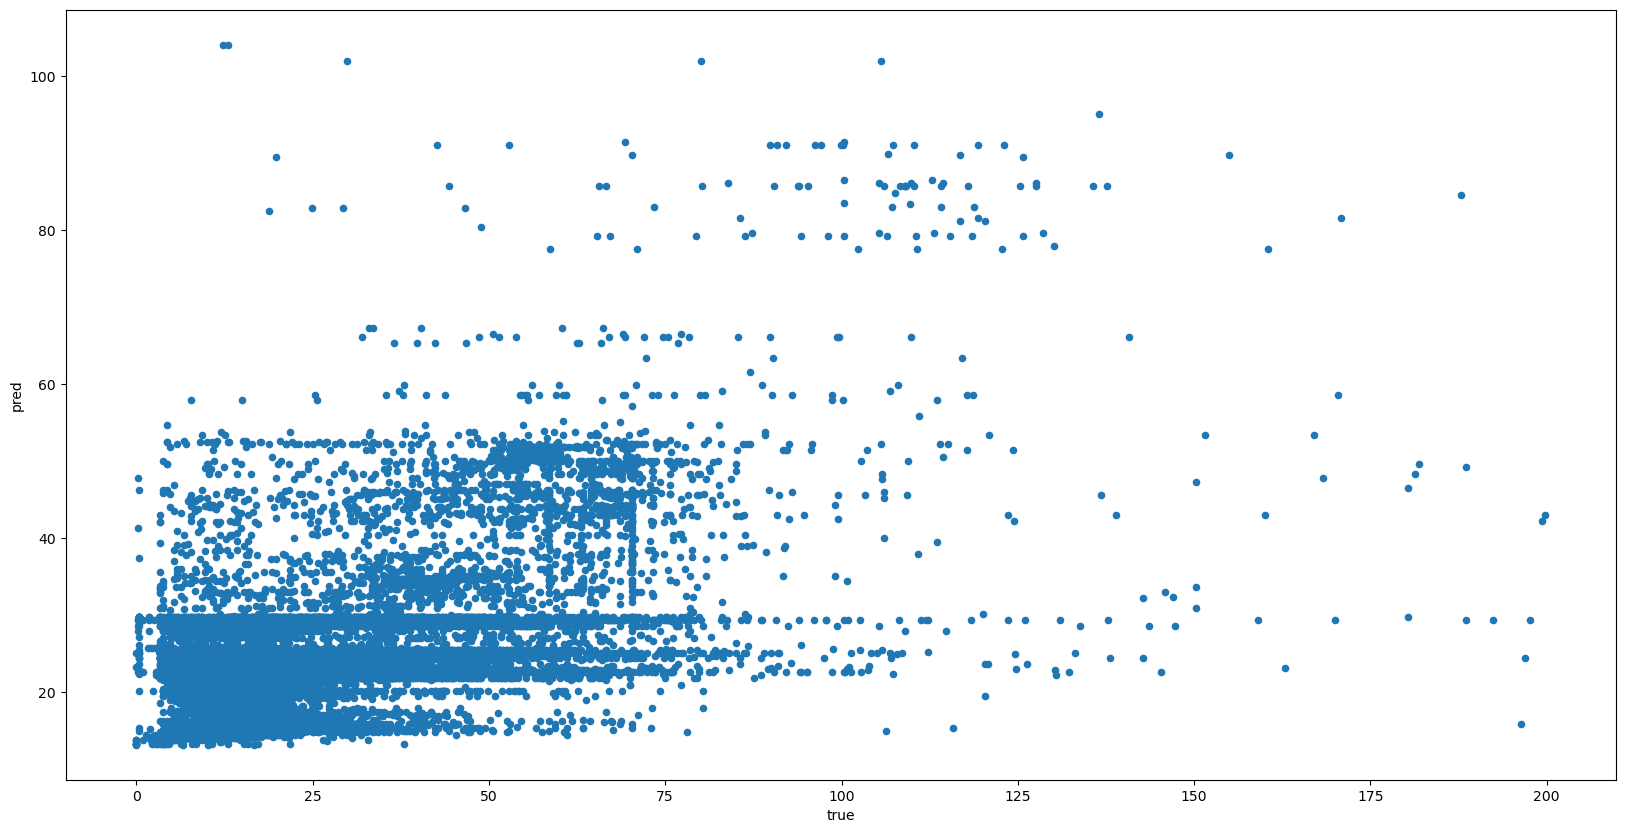

In [113]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<AxesSubplot:>

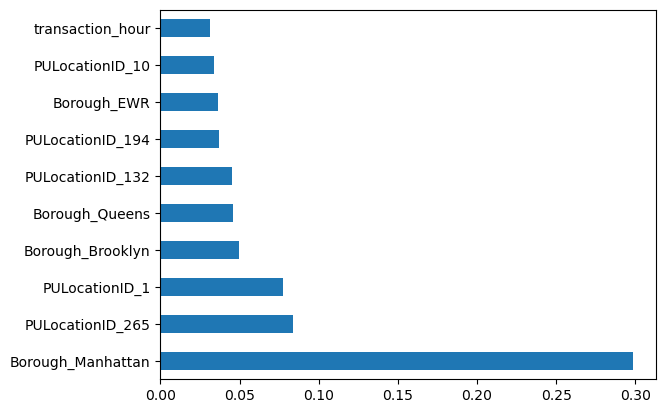

In [114]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

## Comparing all algorithm models

## Tuning of Model
### -Finding the best parameters

In [116]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [117]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [118]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [119]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,68.562443,0.292623,3.142765,0.172594,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.402022,0.415135,0.411718,0.409625,0.005554,2
1,21.904019,0.210710,1.073331,0.101182,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.354389,0.371042,0.360880,0.362104,0.006853,7
2,28.472267,0.361440,1.073873,0.116258,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.356124,0.372045,0.361931,0.363367,0.006578,6
3,428.762158,3.334414,1.282840,0.054973,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.351961,0.365844,0.361048,0.359618,0.005757,8
4,1037.955282,30.629442,4.432428,0.122509,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.350632,0.365688,0.375448,0.363923,0.010207,5
5,383.724775,1.406256,36.027664,0.802220,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.382739,0.394107,0.390362,0.389070,0.004730,4
6,68.703491,0.283707,2.152666,0.080654,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.270225,0.279825,0.270723,0.273591,0.004413,9
7,230.114225,2.375930,10.040624,0.363007,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.401383,0.418400,0.408449,0.409411,0.006980,3
8,1783.318646,49.053824,9.783794,0.328135,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.213907,0.213926,0.191022,0.206285,0.010792,10
9,182.557386,0.722691,7.028814,0.060083,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.411666,0.426620,0.421817,0.420034,0.006234,1


In [120]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=1800,min_samples_split= 2,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  232.60826468467712  seconds
mean_absolute_error 7.4153347926114295
mean_squared_error 161.14331682396224
root_mean_squared_error 12.69422375822808
r2 0.4319597286506479


In [121]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  27.00233292579651  seconds
mean_absolute_error 7.342655382256848
mean_squared_error 160.5043362361905
root_mean_squared_error 12.669030595755562
r2 0.4342121751908997


<AxesSubplot:xlabel='true', ylabel='pred'>

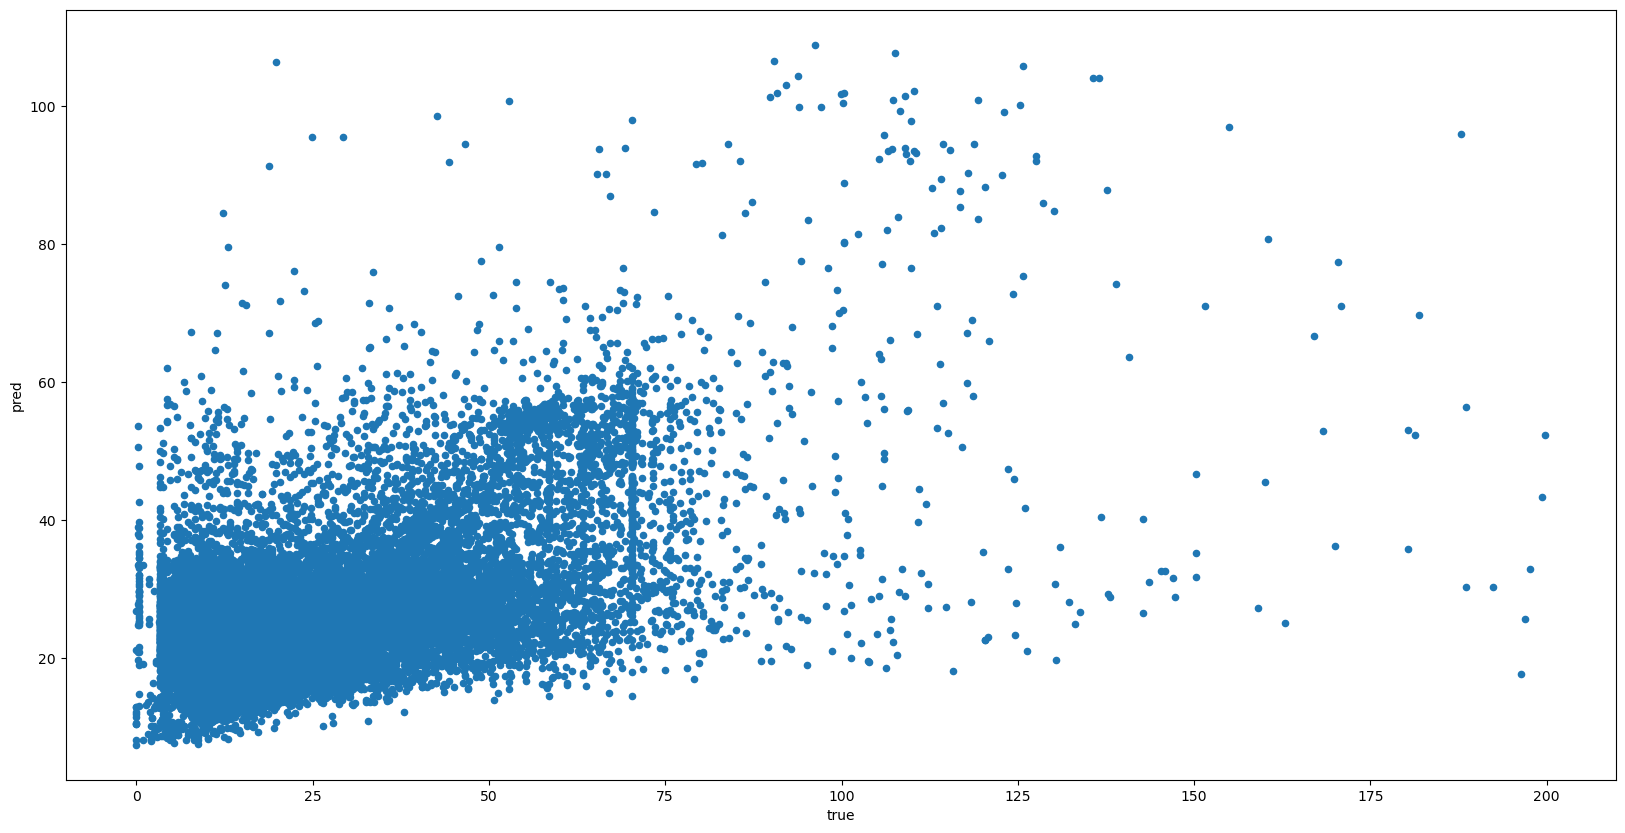

In [122]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Bonus Classification
### -We've dealt with our project as a regression problem so far, predicting a continuous value. Could there be another way of thinking about this problem? What would be the use of transforming this problem into a classification problem?

<AxesSubplot:>

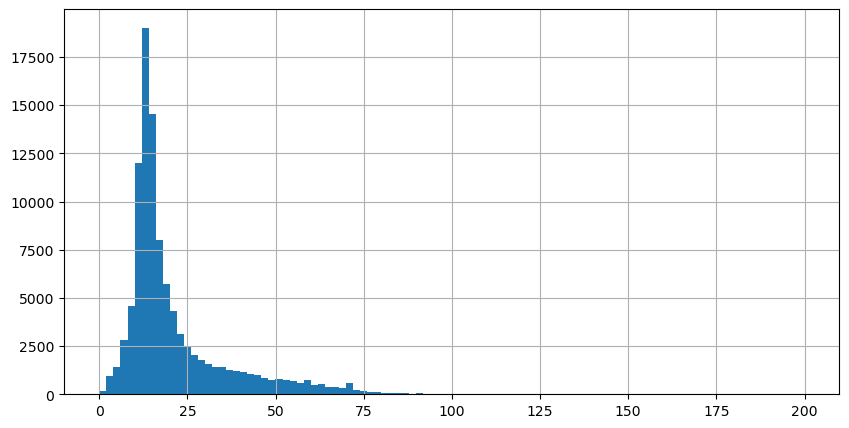

In [123]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [124]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,10,2019-01-01,1.0,1.0,0.0,3.020000,14.300000,2.0,1.0,False,True,Queens,8.3,97.0,0.0,1.0,29.0,low,0
1,100,2019-01-01,1.0,1.0,0.0,2.801852,18.130000,54.0,1.0,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
2,106,2019-01-01,1.0,1.0,0.0,2.593333,15.373333,3.0,1.0,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,high,1
3,107,2019-01-01,1.0,1.0,0.0,2.437458,14.897458,421.0,1.0,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,low,0
4,11,2019-01-01,1.0,1.0,0.0,1.795000,9.300000,2.0,1.0,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,low,0


In [125]:
nyc_class['earning_class'].value_counts()

high    53099
low     49457
Name: earning_class, dtype: int64

In [126]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'earning_class_binary'

In [127]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [128]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[11381  4999]
 [ 3644 13820]]
accuracy 0.7446223850608675
precision 0.7343642063871619
recall 0.7913421896472744
